# Dibatics Predction


---

1.   We are going to predict wheter a patient has diabatics or not using  support vector maching which is one of the machine learning algorithm.

2.  we are training the data on the PIMA Indians Data set




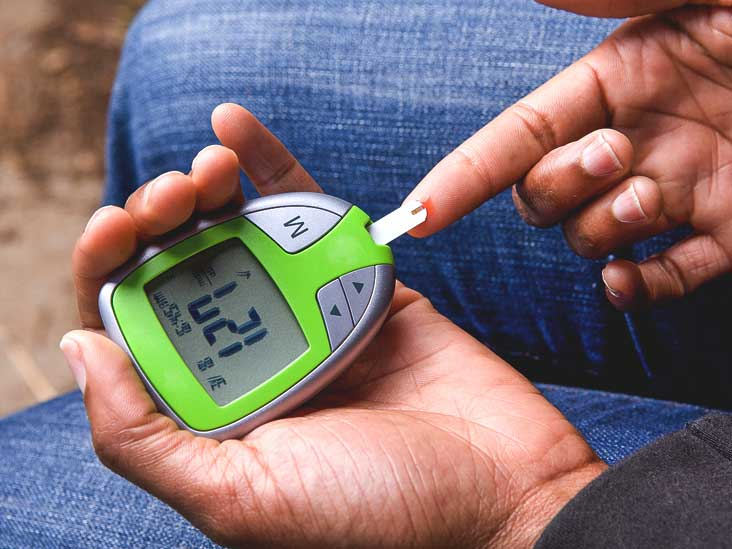

***import all the necessary libraries***

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

**Read the data from excell**

In [31]:
data=pd.read_csv("/content/diabetes.csv")

# Exploratory Data analysis

In [32]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
161,7,102,74,40,105,37.2,0.204,45,0
750,4,136,70,0,0,31.2,1.182,22,1
115,4,146,92,0,0,31.2,0.539,61,1
347,3,116,0,0,0,23.5,0.187,23,0
754,8,154,78,32,0,32.4,0.443,45,1


In [33]:
data.shape

(768, 9)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [38]:
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [39]:
#axis is equal to one when droping the column
# axis is equa to  0 when droping the row


In [40]:
X=data.drop(columns="Outcome",axis=1)
Y=data["Outcome"]

# Data Standardization

In [41]:
Scaller=StandardScaler()

In [42]:
standard_data=Scaller.fit_transform(X)

In [43]:
X=standard_data
Y=data["Outcome"]


# Train Test Split


In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [45]:
X_train.shape

(614, 8)

# Trainig the data

In [46]:
classifier=svm.SVC(kernel="linear")

In [47]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evaluation

In [48]:
prediction=classifier.predict(X_train)

In [56]:
training_accuracy=accuracy_score(prediction,Y_train)

In [59]:
print("Training_accuracy",training_accuracy*100)

Training_accuracy 78.66449511400651


In [61]:
X_test_prediction=classifier.predict(X_test)
test_accuracy=accuracy_score(X_test_prediction,Y_test)

In [62]:
print("Test_accuracy_accuracy",test_accuracy*100)

Test_accuracy_accuracy 77.27272727272727


# *Prediction*

In [69]:
prediction=classifier.predict(X_test[115].reshape(1,-1))

In [70]:
prediction

array([1])